# 76. PCA 실습

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
X.shape

(200, 2)

In [3]:
rng.rand(2,2)
        # 2 * 2 로 0 ~ 1 사이의 값을 나타낸것.

array([[0.60735693, 0.79695268],
       [0.81266616, 0.26598051]])

In [4]:
rng.randn(2, 200)
        # 표준편차가 1, 평균이 0인 정규분포
        # 표준 정규분포를 2 * 200으로 나타낸 것.

array([[-2.23305285e+00,  1.42026788e-01,  7.42047827e-01,
         1.11144113e+00,  4.49767208e-01, -1.43039670e+00,
         9.42539772e-01, -5.35146593e-01, -4.58967168e-01,
         1.15152877e+00, -1.97741771e+00,  2.23864876e+00,
         9.00084997e-01,  8.89032373e-01, -1.52296574e-01,
         7.04626895e-01,  6.12955068e-01,  2.39663182e-01,
        -1.51202147e+00,  4.44697716e-01,  2.53220525e-01,
         9.40787068e-01,  4.17302320e-01,  2.69558553e-01,
         1.68721062e-01, -1.48895017e+00, -1.85526666e+00,
        -1.10321722e-01, -7.04604762e-01,  4.55318527e-01,
        -1.22067190e+00, -5.65046518e-01,  7.06188812e-01,
         5.04389807e-03, -8.73259179e-01,  5.56018081e-01,
         2.67381976e-01, -1.03193483e+00, -6.35903189e-01,
         1.99779097e-01, -1.96516643e-01, -2.64890894e-01,
        -5.36168707e-01, -2.69395632e+00,  4.81339952e-01,
         3.08090862e-01, -1.37528268e-01, -1.80036570e+00,
        -4.19985810e-01, -2.85337341e-02, -2.31813179e-0

In [10]:
np.dot(rng.rand(2,2), rng.randn(2,200)).T
                                        # Transpose

array([[-2.18026492e-01, -3.09688965e-01],
       [-3.18775296e-01, -4.54085117e-01],
       [ 2.72320041e-02,  3.17380110e-02],
       [-7.87061384e-01, -1.13057604e+00],
       [ 6.59317981e-01,  9.38089215e-01],
       [-2.83183484e-02, -4.48374529e-02],
       [ 7.15935328e-01,  1.01975684e+00],
       [-3.35766950e-01, -4.73746675e-01],
       [-1.51382031e-01, -2.15894825e-01],
       [ 5.20148253e-01,  7.42821904e-01],
       [ 3.60436140e-01,  5.17815888e-01],
       [ 2.87761264e-01,  4.09020124e-01],
       [ 1.13988748e+00,  1.61776592e+00],
       [ 2.23618510e-02,  2.85159822e-02],
       [ 3.78480864e-01,  5.35904490e-01],
       [-1.85557469e-01, -2.57215851e-01],
       [-8.71105155e-01, -1.22045282e+00],
       [ 6.62699876e-01,  9.38227190e-01],
       [ 6.78371819e-02,  8.67056267e-02],
       [ 3.82112444e-01,  5.44553063e-01],
       [ 6.73421755e-04,  1.40728580e-03],
       [ 4.76768437e-01,  6.69696373e-01],
       [-6.00389848e-02, -8.02142593e-02],
       [ 2.

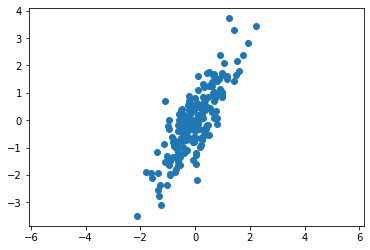

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
        # x 축 y축의 간격을 동일하게
plt.show()

# fit

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=13)
pca.fit(X)

PCA(n_components=2, random_state=13)

In [15]:
# 벡터와 분산값
pca.components_

## 벡터가 2개만 나오는 이유는 n_components를 2로 설정했기 때문.

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [16]:
pca.explained_variance_

## 두개 벡터의 설명력을 알려주는 것. 
## 값이 높으면 설명을 잘 한것이다.

array([1.82531406, 0.13209947])

In [17]:
pca.explained_variance_ratio_

## 1번 요소가 93퍼센트 / 2번째가 6퍼센트를 설명한다.

array([0.93251326, 0.06748674])

In [20]:
pca.mean_
    # 좌표의 중심점. 

array([-0.03360413, -0.03527382])

In [41]:
## 주성분 벡터 그리기
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
                # ax가 None일 때
        # ax의 값이 있을 때
    arrowprops = dict(
        arrowstyle = '->',
        linewidth=2,
        color='black',
        shrinkA=0,
        # 수축, 기준 점에서 얼마나 멀어지게 만드는지
        shrinkB=0,
    )

    # annotate docu : https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html?highlight=annotate#matplotlib.pyplot.annotate
    ax.annotate('', v1, v0, arrowprops=arrowprops)
        # 화살표 그리는 기능
                # 화살표의 이름

                            # arrowprops : 화살표의 성질을 dict 형식으로 받음.


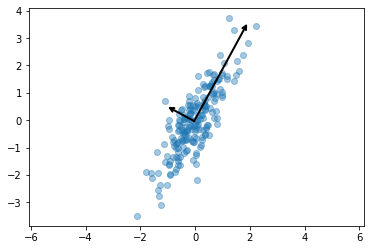

In [42]:
plt.scatter(X[:,0], X[:,1], alpha=0.4)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
                # 임의로 넣었음
                    # length에 루트를 
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show()

## 벡터로 설명할 수 있다.(?)

In [43]:
# component_  = 1로 설정 

pca = PCA(n_components=1, random_state=13)
pca.fit(X)

PCA(n_components=1, random_state=13)

In [44]:
pca.components_

array([[0.47802511, 0.87834617]])

In [46]:
pca.mean_       # 좌표 원점

array([-0.03360413, -0.03527382])

In [47]:
pca.explained_variance_ratio_

array([0.93251326])

In [50]:
X_pca = pca.transform(X)
X_pca.shape       # 1개의 컴포넌트로 변경함

(200, 1)

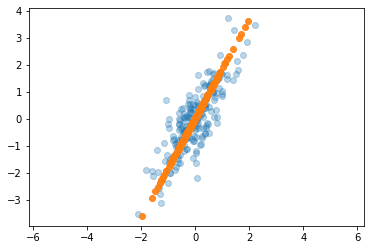

In [52]:
X_new = pca.inverse_transform(X_pca)
            # 2 차원으로 바꿔주는 것.
# X_new.shape
plt.scatter(X[:,0],X[:,1], alpha=0.3)
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.9)
plt.axis('equal')
plt.show()

## 2차원 데이터를 pca 를 통해 1차원 (X_pca)로 바꾸고 다시 2차원으로 바꿨다(X_new)